In [9]:

# Parameters
vname = "temp"
model_name = "AWICM-3"
model_path = "/work/ab0995/a270275/experiments/awicm3test011/outdata"
reference_path = "/work/ab0246/a270092/postprocessing/climatologies/fdiag/"
reference_years = "1985"
model_start = 1990
model_end = 1991
year=[model_start,model_end]
#remap_resolution = "180x91"
mesh_file = "mesh.nc"
meshpath = "/work/ab0246/a270092/input/fesom2/core2/"
out_path = "./output/"
dpi = 150

# parameters
#___Dask Client Parameters____________________________________________________________
do_papermill      = False
do_parallel       = True
parallel_tnprc    = 128                          # total number of available CPUs
parallel_nprc     = 72                           # number of dask workers
parallel_nprc_bin = parallel_tnprc-parallel_nprc # number of processor used to parallize the binning loop
parallel_tmem     = 200                          # max. available RAM

#___Mesh Path & Save Path_____________________________________________________________
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path         = '/work/ab0995/a270275/runconfig/Results/AWICM3_test031' #~/figures/test_papermill/'
save_fname        = None # filename from papermill come in through save_fname
tripyrun_name     = 'AWICM3_test018' # papermill workflow name of notebook 
tripyrun_analysis = None # papermill diagnostic driver
tripyrun_spath_nb = None # papermill path to processed notebooks
tripyrun_spath_fig= None # papermill path to processed figures

#___Data Path & Input Names___________________________________________________________
input_paths   = list()
input_paths.append('/work/ab0995/a270275/experiments/5Ymulti_diag/outdata/fesom/')


input_names   = list()
input_names.append('Fesom 2.6')
input_paths = ["/work/ab0995/a270275/experiments/awicm3test011/outdata/fesom"]
# n_cycl: which spinupcycle should be plottet if do_allcycl all spinupcycles from [1...n_cycle] are plottet, if None path is directly used
n_cycl    = None
do_allcycl= False


mon, day, record, box, depth = None, None, None, None, None

In [3]:
# Add the parent directory to sys.path and load config
import sys
import os
import pdb
print("tripypath",tripyview_path)
sys.path.append(tripyview_path)
from config import *

# Mark as started
SCRIPT_NAME = "part11_zonal_plots.ipynb"   #ADAPT
update_status(SCRIPT_NAME, " Started")


tripypath /home/a/a270275/tripyview


/home/a/a270275/.conda/envs/reval/lib/python3.12/site-packages/pyfesom2/climatology.py:14: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.
/work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2


/work/ab0995/a270275/runconfig/Results/AWICM3_test031/figures
1991
1991


100%|██████████| 2/2 [00:00<00:00, 33.83it/s]

Depth is None, 3d field will be returned
[[0.45380425 0.34656513 0.94218427 ... 0.3461784  0.         0.        ]]
[[1. 1. 1. ... 1. 0. 0.]]
Depth is None, 3d field will be returned
[[0.7343327  0.44572002 0.99010664 ... 0.8326761  0.         0.        ]]
[[1. 1. 1. ... 1. 0. 0.]]
Depth is None, 3d field will be returned
[[0.00110424 0.15220767 0.64797044 ... 0.22845995 0.         0.        ]]
[[0. 1. 1. ... 1. 0. 0.]]
Depth is None, 3d field will be returned
[[0.3690845  0.73481256 0.96591187 ... 0.72963405 0.         0.        ]]
[[1. 1. 1. ... 1. 0. 0.]]
[1990 1991]


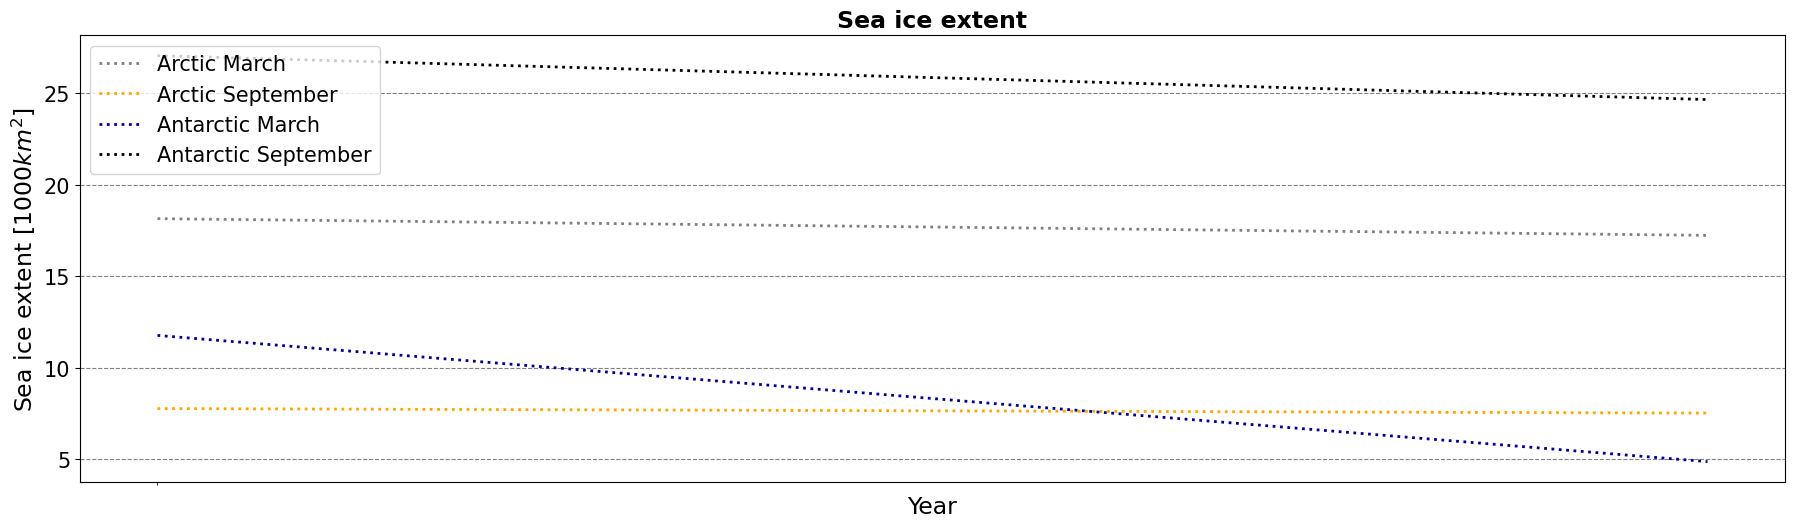

In [7]:
# parameters cell

out_path = save_path +  "/figures"
print(out_path)


input_paths = [os.path.dirname(path.rstrip(os.sep)) for path in input_paths]

input_names = [model_name]
exps = list(range(model_start, model_end+1))
saved_filenames=[]
variables=['u','t']
res=[320, 160]


#runs=[spinup_name, historic_name, pi_ctrl_name]
runs=[model_name]

runid ='fesom'
str_id='a_ice'
fig, ax1 = plt.subplots(1, sharex=True,figsize=(22,5.8))
saved_filenames = []
class MinorSymLogLocator(mticker.Locator):
    """
    Dynamically find minor tick positions based on the positions of major ticks for a symlog scaling.
    
    Attributes
    ----------
    linthresh : float
        The same linthresh value used when setting the symlog scale.
        
    """
    
    def __init__(self, linthresh):
        #super().__init__()
        self.linthresh = linthresh

    def __call__(self):
        majorlocs = self.axis.get_majorticklocs()
        # iterate through minor locs
        minorlocs = []
        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)
        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a {0} type.'.format(type(self)))

        
for exp in runs:  
    if exp == model_name: 
        datapath   = model_path+'/fesom'
        year_start = model_start
        year_end   = model_end
        print(model_end)
        print(year_end)
    extent_north_march = []
    extent_south_march = []
    extent_north_sep = []
    extent_south_sep = []       
    for y in tqdm(range(year_start, year_end+1)): 
        for x in range(2, 3):
            data = pf.get_data(datapath, str_id, y, mesh, records=[x])
            extent_north_march.append(pf.ice_ext(data, mesh, hemisphere="N"))
            extent_south_march.append(pf.ice_ext(data, mesh, hemisphere="S"))
        for x in range(8, 9):
            data = pf.get_data(datapath, str_id, y, mesh, records=[x])
            extent_north_sep.append(pf.ice_ext(data, mesh, hemisphere="N"))
            extent_south_sep.append(pf.ice_ext(data, mesh, hemisphere="S"))
           
    #if exp == 'SPIN':
    #    years = np.linspace(year_start-700, year_end-700,year_end-year_start+1)
    #else:
    years = np.arange(year_start, year_end + 1)
    print(years)
    extent_north_march = np.squeeze(np.asarray(extent_north_march))
    extent_south_march = np.squeeze(np.asarray(extent_south_march))
    extent_north_sep = np.squeeze(np.asarray(extent_north_sep))
    extent_south_sep = np.squeeze(np.asarray(extent_south_sep))
    

    if exp == model_name:
        linestyle=':'
        alpha=1
  
        
    ax1.plot(years,extent_north_march/1000000000000,linewidth=2,color='grey',linestyle=linestyle,alpha=alpha,label='Arctic March');
    ax1.tick_params(axis='both', labelsize=17)
        
    ax1.plot(years,extent_north_sep/1000000000000,linewidth=2,color='Orange',linestyle=linestyle,alpha=alpha,label='Arctic September');
    ax1.tick_params(axis='both', labelsize=17)
    
    ax1.plot(years,extent_south_march/1000000000000,linewidth=2,color='Darkblue',linestyle=linestyle,alpha=alpha,label='Antarctic March');
    ax1.tick_params(axis='both', labelsize=17)

    ax1.plot(years,extent_south_sep/1000000000000,linewidth=2,color='black',linestyle=linestyle,alpha=alpha,label='Antarctic September');
    ax1.tick_params(axis='both', labelsize=17)
    
ax1.set_title('Sea ice extent', fontsize=17,fontweight='bold')

#fig.text(-0.04, 0.5, 'Sea ice extent [$1000 km^2$]', fontsize=13, va='center', rotation=90)
#fig.text(0.5, -0.02, 'Year', fontsize=13, ha='center', rotation=0)
ax1.set_ylabel('Sea ice extent [$1000 km^2$]', fontsize=17)
ax1.set_xlabel('Year', fontsize=17)

ax1.yaxis.grid(color='gray', linestyle='dashed')

#plt.axvline(x=1950,color='black',alpha=0.7,linewidth=3)
#plt.axvline(x=1650,color='grey',alpha=0.5,linewidth=3)
#plt.text(1960,ax1.get_ylim()[1]-2,'HIST & PICT',fontsize=15)
#plt.text(1910,ax1.get_ylim()[1]-2,'SPIN',fontsize=15)

ax1.xaxis.set_major_locator(MultipleLocator(50))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# For the minor ticks, use no labels; default NullFormatter.
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ofile='_part6_ice_conc_timeseries'
legend=['Arctic March','Arctic September','Antarctic March','Antarctic September']
plt.legend(legend,loc='upper left',fontsize=15)
plt.savefig(out_path+"/"+tripyrun_name +ofile+"_sea_ice_extent.png",dpi=150,bbox_inches = "tight")#%%capture
saved_filenames.append(out_path+"/sea_ice_extent_comparison.png")
runs=[model_name]


# Mark as completed
update_status(SCRIPT_NAME, " Completed")